<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_groupwise_(y_hat)_0_5_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n250.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,-0.924980,136.636693,137.586084,-0.949391
1,0.0,1.0,57.329540,88.266135,0.043047,155.638722,155.658161,-0.019439
2,0.0,2.0,45.215694,22.043105,-1.115502,76.143296,77.113063,-0.969766
3,0.0,3.0,69.375325,71.150993,1.442776,151.969095,150.584167,1.384927
4,0.0,4.0,87.837297,47.725671,-1.202881,144.360086,145.620870,-1.260783
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,98.330395,73.668159,-0.433690,181.564863,182.108449,-0.543586
249996,999.0,246.0,94.959135,43.787704,1.019669,149.766509,148.828678,0.937831
249997,999.0,247.0,84.253583,80.925317,-0.316474,174.862426,175.291543,-0.429117
249998,999.0,248.0,92.666128,49.627275,-0.068221,152.225182,152.379919,-0.154737


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,-0.924980,136.636693,137.586084,-0.949391
1,0.0,1.0,57.329540,88.266135,0.043047,155.638722,155.658161,-0.019439
2,0.0,2.0,45.215694,22.043105,-1.115502,76.143296,77.113063,-0.969766
3,0.0,3.0,69.375325,71.150993,1.442776,151.969095,150.584167,1.384927
4,0.0,4.0,87.837297,47.725671,-1.202881,144.360086,145.620870,-1.260783
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,98.330395,73.668159,-0.433690,181.564863,182.108449,-0.543586
249996,999.0,246.0,94.959135,43.787704,1.019669,149.766509,148.828678,0.937831
249997,999.0,247.0,84.253583,80.925317,-0.316474,174.862426,175.291543,-0.429117
249998,999.0,248.0,92.666128,49.627275,-0.068221,152.225182,152.379919,-0.154737


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  58.707153 -0.924980  136.636693  137.586084 -0.949391
      1.0    57.329540  88.266135  0.043047  155.638722  155.658161 -0.019439
      2.0    45.215694  22.043105 -1.115502   76.143296   77.113063 -0.969766
      3.0    69.375325  71.150993  1.442776  151.969095  150.584167  1.384927
      4.0    87.837297  47.725671 -1.202881  144.360086  145.620870 -1.260783
...                ...        ...       ...         ...         ...       ...
999.0 245.0  98.330395  73.668159 -0.433690  181.564863  182.108449 -0.543586
      246.0  94.959135  43.787704  1.019669  149.766509  148.828678  0.937831
      247.0  84.253583  80.925317 -0.316474  174.862426  175.291543 -0.429117
      248.0  92.666128  49.627275 -0.068221  152.225182  152.379919 -0.154737
      249.0  57.143777  39.659980  0.457693  107.261450  106.871521  0.389929

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  58.707153 -0.924980  136.636693  137.586084 -0.949391
      1.0    57.329540  88.266135  0.043047  155.638722  155.658161 -0.019439
      2.0    45.215694  22.043105 -1.115502   76.143296   77.113063 -0.969766
      3.0    69.375325  71.150993  1.442776  151.969095  150.584167  1.384927
      4.0    87.837297  47.725671 -1.202881  144.360086  145.620870 -1.260783
...                ...        ...       ...         ...         ...       ...
999.0 245.0  98.330395  73.668159 -0.433690  181.564863  182.108449 -0.543586
      246.0  94.959135  43.787704  1.019669  149.766509  148.828678  0.937831
      247.0  84.253583  80.925317 -0.316474  174.862426  175.291543 -0.429117
      248.0  92.666128  49.627275 -0.068221  152.225182  152.379919 -0.154737
      249.0  57.143777  39.659980  0.457693  107.261450  106.871521  0.389929

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,-0.924980,136.636693,137.586084,-0.949391
1,0.0,1.0,57.329540,88.266135,0.043047,155.638722,155.658161,-0.019439
2,0.0,2.0,45.215694,22.043105,-1.115502,76.143296,77.113063,-0.969766
3,0.0,3.0,69.375325,71.150993,1.442776,151.969095,150.584167,1.384927
4,0.0,4.0,87.837297,47.725671,-1.202881,144.360086,145.620870,-1.260783
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,98.330395,73.668159,-0.433690,181.564863,182.108449,-0.543586
249996,999.0,246.0,94.959135,43.787704,1.019669,149.766509,148.828678,0.937831
249997,999.0,247.0,84.253583,80.925317,-0.316474,174.862426,175.291543,-0.429117
249998,999.0,248.0,92.666128,49.627275,-0.068221,152.225182,152.379919,-0.154737


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  58.707153 -0.924980  136.636693  137.586084 -0.949391
      1.0    57.329540  88.266135  0.043047  155.638722  155.658161 -0.019439
      2.0    45.215694  22.043105 -1.115502   76.143296   77.113063 -0.969766
      3.0    69.375325  71.150993  1.442776  151.969095  150.584167  1.384927
      4.0    87.837297  47.725671 -1.202881  144.360086  145.620870 -1.260783
...                ...        ...       ...         ...         ...       ...
999.0 245.0  98.330395  73.668159 -0.433690  181.564863  182.108449 -0.543586
      246.0  94.959135  43.787704  1.019669  149.766509  148.828678  0.937831
      247.0  84.253583  80.925317 -0.316474  174.862426  175.291543 -0.429117
      248.0  92.666128  49.627275 -0.068221  152.225182  152.379919 -0.154737
      249.0  57.143777  39.659980  0.457693  107.261450  106.871521  0.389929

[250000 rows x 6 columns]

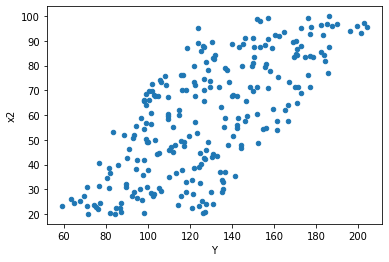

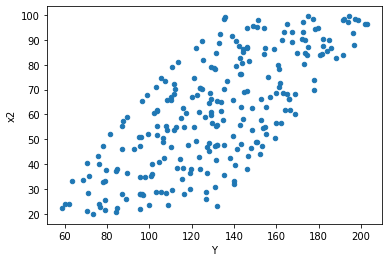

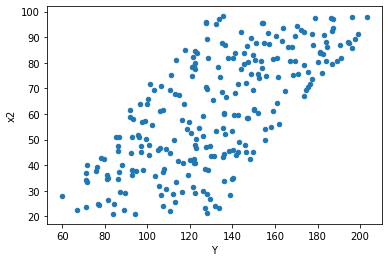

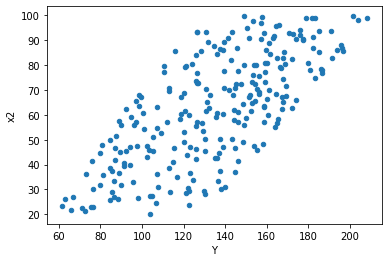

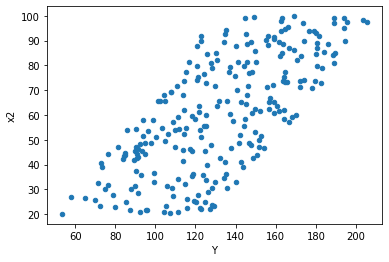

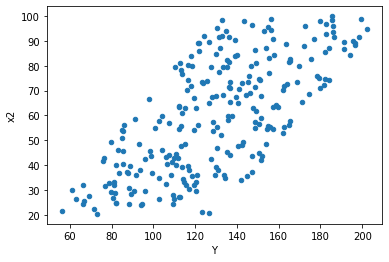

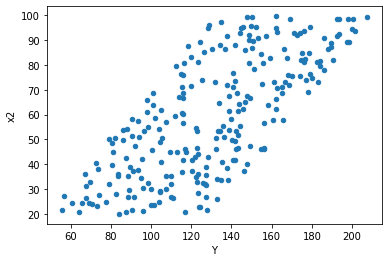

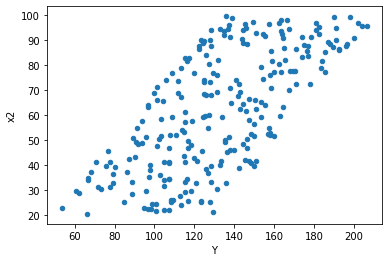

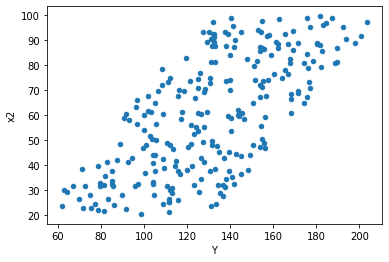

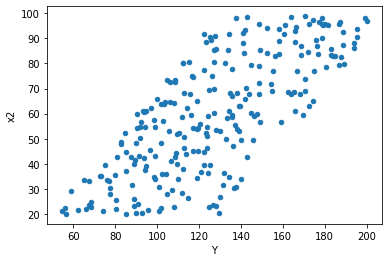

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,98.0,98.0,38.052559785175895,42.145970186542066,0.3882914263793459,0.4300609202708374,1.1075725371558536,0.6140355006224463,0.6929822496887769,0.30701775031122314,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,42.83121511972941,52.24578141040403,0.4370532155074429,0.5331202184735105,1.2198061919176788,0.3270039038240953,0.8364980480879524,0.16350195191204764,Reject001=1 : Homoscedasticity
7.0,98.0,98.0,45.33882780254122,49.000455504611224,0.4626411000259308,0.500004648006237,1.0807614109040724,0.7014242023617476,0.6492878988191262,0.3507121011808738,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,48.57115144447878,58.48450908605306,0.49562399433141613,0.5967807049597251,1.2040997041815273,0.3594943547475349,0.8202528226262326,0.17974717737376744,Reject001=1 : Homoscedasticity
9.0,98.0,98.0,46.329139359006994,49.39887146116849,0.47274631998986727,0.5040701169506989,1.0662592084513804,0.7514544634911906,0.6242727682544047,0.3757272317455953,Reject001=1 : Homoscedasticity
10.0,98.0,98.0,39.267301522920576,43.8330285372251,0.40068675023388345,0.4472758014002561,1.116273001638258,0.5871806192366864,0.7064096903816568,0.2935903096183432,Reject001=1 : Homoscedasticity
15.0,98.0,98.0,54.08700002250181,54.36158740872649,0.5519081634949164,0.5547100755992499,1.0050767723502956,0.9800539289007411,0.5099730355496295,0.49002696445037053,Reject001=1 : Homoscedasticity
17.0,98.0,98.0,50.42732089175724,58.24764592061465,0.5145644988954821,0.594363733883823,1.1550811125906097,0.4767851313777496,0.7616074343111252,0.2383925656888748,Reject001=1 : Homoscedasticity
18.0,98.0,98.0,35.075492144784555,53.88952421806596,0.3579131851508628,0.5498931042659791,1.5363868308852482,0.03467528246437279,0.9826623587678136,0.017337641232186396,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,53.646755052264204,50.67668725757711,0.547415867880247,0.517109053648746,0.944636580687992,0.778575672061093,Reject001=1 : Homoscedasticity
1.0,98.0,98.0,56.432255468906064,41.27662737324401,0.5758393415194496,0.42119007523718377,0.7314367825682115,0.12333109373201365,Reject001=1 : Homoscedasticity
2.0,98.0,98.0,55.764662808712295,43.273175780970114,0.5690271715174724,0.4415630181731644,0.7759963676174045,0.21114351638021392,Reject001=1 : Homoscedasticity
3.0,98.0,98.0,49.45195195234687,47.217768802275856,0.5046117546157843,0.4818139673701618,0.9548211332037222,0.8194597610243778,Reject001=1 : Homoscedasticity
4.0,98.0,98.0,38.052559785175895,42.145970186542066,0.3882914263793459,0.4300609202708374,1.1075725371558536,0.6140355006224463,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,42.83121511972941,52.24578141040403,0.4370532155074429,0.5331202184735105,1.2198061919176788,0.3270039038240953,Reject001=1 : Homoscedasticity
6.0,98.0,98.0,48.35539298774639,47.85730250120064,0.4934223774259836,0.4883398214408229,0.9896993808597115,0.9592305467708855,Reject001=1 : Homoscedasticity
7.0,98.0,98.0,45.33882780254122,49.000455504611224,0.4626411000259308,0.500004648006237,1.0807614109040724,0.7014242023617476,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,48.57115144447878,58.48450908605306,0.49562399433141613,0.5967807049597251,1.2040997041815273,0.3594943547475349,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      990
Reject001=0 : Heteroscedasticity     10
Name: Result_test, dtype: int64